In [696]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## Task 1 -> Data Collection and Preprocessing
- Import and examine the dataset
- Do we have any missing values?


In [697]:
#read the file
df = pd.read_csv("data/ProjectDataSet.csv")
print("bbb")


bbb


In [698]:
df.head()

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0


In [699]:
#sort the values by Neighborhood
#df_sorted = df.sort_values(by='RACE/ETHNICITY')
#df_sorted #RACE/ETHNICITY get grouped by the same name

In [700]:
# Check what type is each column
df.dtypes

YEAR                                                                    int64
Borough                                                                object
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

Since the TOTAL NUMBER OF AIDS DIAGNOSES column is currently of type object but contains numerical values, we will:
- Create an array to hold all the columns that we plan to convert to numerical values.
- Create an array to hold all the categorical columns
- Convert it to a numeric type using the coerce method.


In [701]:
numerical_columns = [
    'TOTAL NUMBER OF HIV DIAGNOSES', 
    'HIV DIAGNOSES PER 100,000 POPULATION', 
    'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 
    'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES', 
    'TOTAL NUMBER OF AIDS DIAGNOSES',  
    'AIDS DIAGNOSES PER 100,000 POPULATION'
]


In [702]:
categorical_columns = ['SEX']      

In [703]:
# Convert columns to numeric
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
numerical_columns


['TOTAL NUMBER OF HIV DIAGNOSES',
 'HIV DIAGNOSES PER 100,000 POPULATION',
 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
 'TOTAL NUMBER OF AIDS DIAGNOSES',
 'AIDS DIAGNOSES PER 100,000 POPULATION']

In [704]:
df2=df

In [705]:
df2[numerical_columns].describe()

,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
count,8960.000000,8892.000000,8972.000000,7081.000000,8963.000000,8895.000000
mean,21.010268,25.241048,3.924209,15.869044,13.517684,16.194570
std,106.363909,43.975241,19.705491,21.498990,70.037027,31.764976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.300000,0.000000,11.100000,1.000000,4.400000
75%,12.000000,33.200000,2.000000,23.500000,7.000000,19.800000
max,3353.000000,821.600000,680.000000,100.000000,2611.000000,565.500000


## Take Care of missing data
1. Replace numerical missing data with mean values.
2. Replace categorical missing data with mode values
   

In [706]:
#check for any missing values
df2.isnull().any()

YEAR                                                                   False
Borough                                                                 True
Neighborhood (U.H.F)                                                   False
SEX                                                                    False
RACE/ETHNICITY                                                         False
TOTAL NUMBER OF HIV DIAGNOSES                                           True
HIV DIAGNOSES PER 100,000 POPULATION                                    True
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           True
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     True
TOTAL NUMBER OF AIDS DIAGNOSES                                          True
AIDS DIAGNOSES PER 100,000 POPULATION                                   True
dtype: bool

In [707]:
#Group columns that have null values into a series
nanColumns= pd.Series(df2.columns[df2.isnull().any()])
print(nanColumns)

0                                              Borough
1                        TOTAL NUMBER OF HIV DIAGNOSES
2                 HIV DIAGNOSES PER 100,000 POPULATION
3        TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES
4    PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AM...
5                       TOTAL NUMBER OF AIDS DIAGNOSES
6                AIDS DIAGNOSES PER 100,000 POPULATION
dtype: object


In [708]:
#count NaN values in each column
count_NaN_values = df2[nanColumns].isnull().sum()
print(count_NaN_values)


Borough                                                                2928
TOTAL NUMBER OF HIV DIAGNOSES                                            16
HIV DIAGNOSES PER 100,000 POPULATION                                     84
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             4
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1895
TOTAL NUMBER OF AIDS DIAGNOSES                                           13
AIDS DIAGNOSES PER 100,000 POPULATION                                    81
dtype: int64


In [709]:
#retrieve the mean 
mean_values = df2[numerical_columns].mean(axis=0, skipna=True, numeric_only=True)
print("Mean: ", mean_values)


Mean:  TOTAL NUMBER OF HIV DIAGNOSES                                          21.010268
HIV DIAGNOSES PER 100,000 POPULATION                                   25.241048
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           3.924209
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    15.869044
TOTAL NUMBER OF AIDS DIAGNOSES                                         13.517684
AIDS DIAGNOSES PER 100,000 POPULATION                                  16.194570
dtype: float64


In [710]:
columns_to_drop = ['Borough']  
df2.drop(columns=columns_to_drop, inplace=True)

In [711]:
# Fill null values with mean values of numerical columns
for column in numerical_columns:
    df2[column] = df2[column].fillna(mean_values[column])


In [712]:
# Fill 0 values with mean values of numerical columns
for column in numerical_columns:
    mean_value = df2[column].mean()  # Calculate the mean of the column
    df2[column].replace(0, mean_value, inplace=True)  

# print the first 20 rows of data
print(df.head(20))

    YEAR           Neighborhood (U.H.F)     SEX          RACE/ETHNICITY  \
0   2010                     Greenpoint    Male                   Black   
1   2011         Stapleton - St. George  Female         Native American   
2   2010               Southeast Queens    Male                     All   
3   2012                 Upper Westside  Female                 Unknown   
4   2013                    Willowbrook    Male                 Unknown   
5   2013       East Flatbush - Flatbush    Male                   Black   
6   2013       East Flatbush - Flatbush  Female         Native American   
7   2013               Southwest Queens  Female                 Unknown   
8   2012           Fordham - Bronx Park    Male                 Unknown   
9   2010           Flushing - Clearview     All                     All   
10  2012                     Greenpoint  Female             Multiracial   
11  2012              Chelsea - Clinton  Female         Native American   
12  2012  Coney Island - 

/var/folders/gf/pxy9rc510wx022dpjskttq180000gn/T/ipykernel_14372/180611422.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[column].replace(0, mean_value, inplace=True)


## Encode Categorical data


In [713]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

#### get dummies methods
1. For all categorical features.
2. Recall that: Race Ethnicity is the var we are applying our regression analysis on


In [730]:
# Step 2: One-hot encode the categorical variable 'sex'
df_encoded = pd.get_dummies(df, columns=['SEX'], drop_first=True)
# Step 3: Define the target variable
y = df_encoded['TOTAL NUMBER OF HIV DIAGNOSES']


In [731]:
print("Data types after one-hot encoding:")
print(df_encoded.dtypes)

Data types after one-hot encoding:
YEAR                                                                     int64
Neighborhood (U.H.F)                                                    object
RACE/ETHNICITY                                                          object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
SEX_Female                                                                bool
SEX_Male                                                                  bool
dtype: object


## Dependent Variable
1. Encode and Display 1 categorical Dependent Variable

In [732]:
# Step 4: Define the features with only 'SEX_Male' and the proportion feature
X = df_encoded[['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES','SEX_Male']]




## Split the dataset into training and testing sets

In [763]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

In [734]:
X.shape

(8976, 2)

In [735]:
y.shape

(8976,)

In [736]:
trainX,testX,trainY,testY = train_test_split(X, y, test_size=.2, random_state=42)

print('Split X: ',trainX.shape, testX.shape)
print('Split Y: ',trainY.shape, testY.shape)

Split X:  (7180, 2) (1796, 2)
Split Y:  (7180,) (1796,)


## Feature Scaling

#### Standardized Scaling

In [737]:
original = df[numerical_columns]
#Standardize dataframe and return as an array
standardizedArray = preprocessing.scale(original)

# Convert standardized array to dataframe 'standardized'
standardized = pd.DataFrame(standardizedArray, columns=numerical_columns)

#### Normalized Scaling

In [738]:
# Normalize dataframe and return as an array
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df[numerical_columns])

# Convert normalized array to dataframe 'normalized'

normalized = pd.DataFrame(normalizedArray, columns=numerical_columns)
#normalized

# Task 2 -> Data Visualization

In [739]:

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [740]:
#we calculate the skew values for each numerical column defined before
#lambda function allows us to define a simple operation without needing a separate function. 
#It takes each column (x) and returns its skewness using the .skew() method.
skew_values = df2[numerical_columns].apply(lambda x: x.skew())
print(skew_values)

TOTAL NUMBER OF HIV DIAGNOSES                                          18.089082
HIV DIAGNOSES PER 100,000 POPULATION                                    5.217254
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          19.480943
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     3.585788
TOTAL NUMBER OF AIDS DIAGNOSES                                         20.134881
AIDS DIAGNOSES PER 100,000 POPULATION                                   6.171833
dtype: float64


In [741]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   SEX                                                                  8976 non-null   object 
 3   RACE/ETHNICITY                                                       8976 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 7   PROPOR

#### Calculate feature correlations and display a correlation heat-map

In [742]:
print(df2.dtypes)


YEAR                                                                     int64
Neighborhood (U.H.F)                                                    object
SEX                                                                     object
RACE/ETHNICITY                                                          object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                  float64
dtype: object


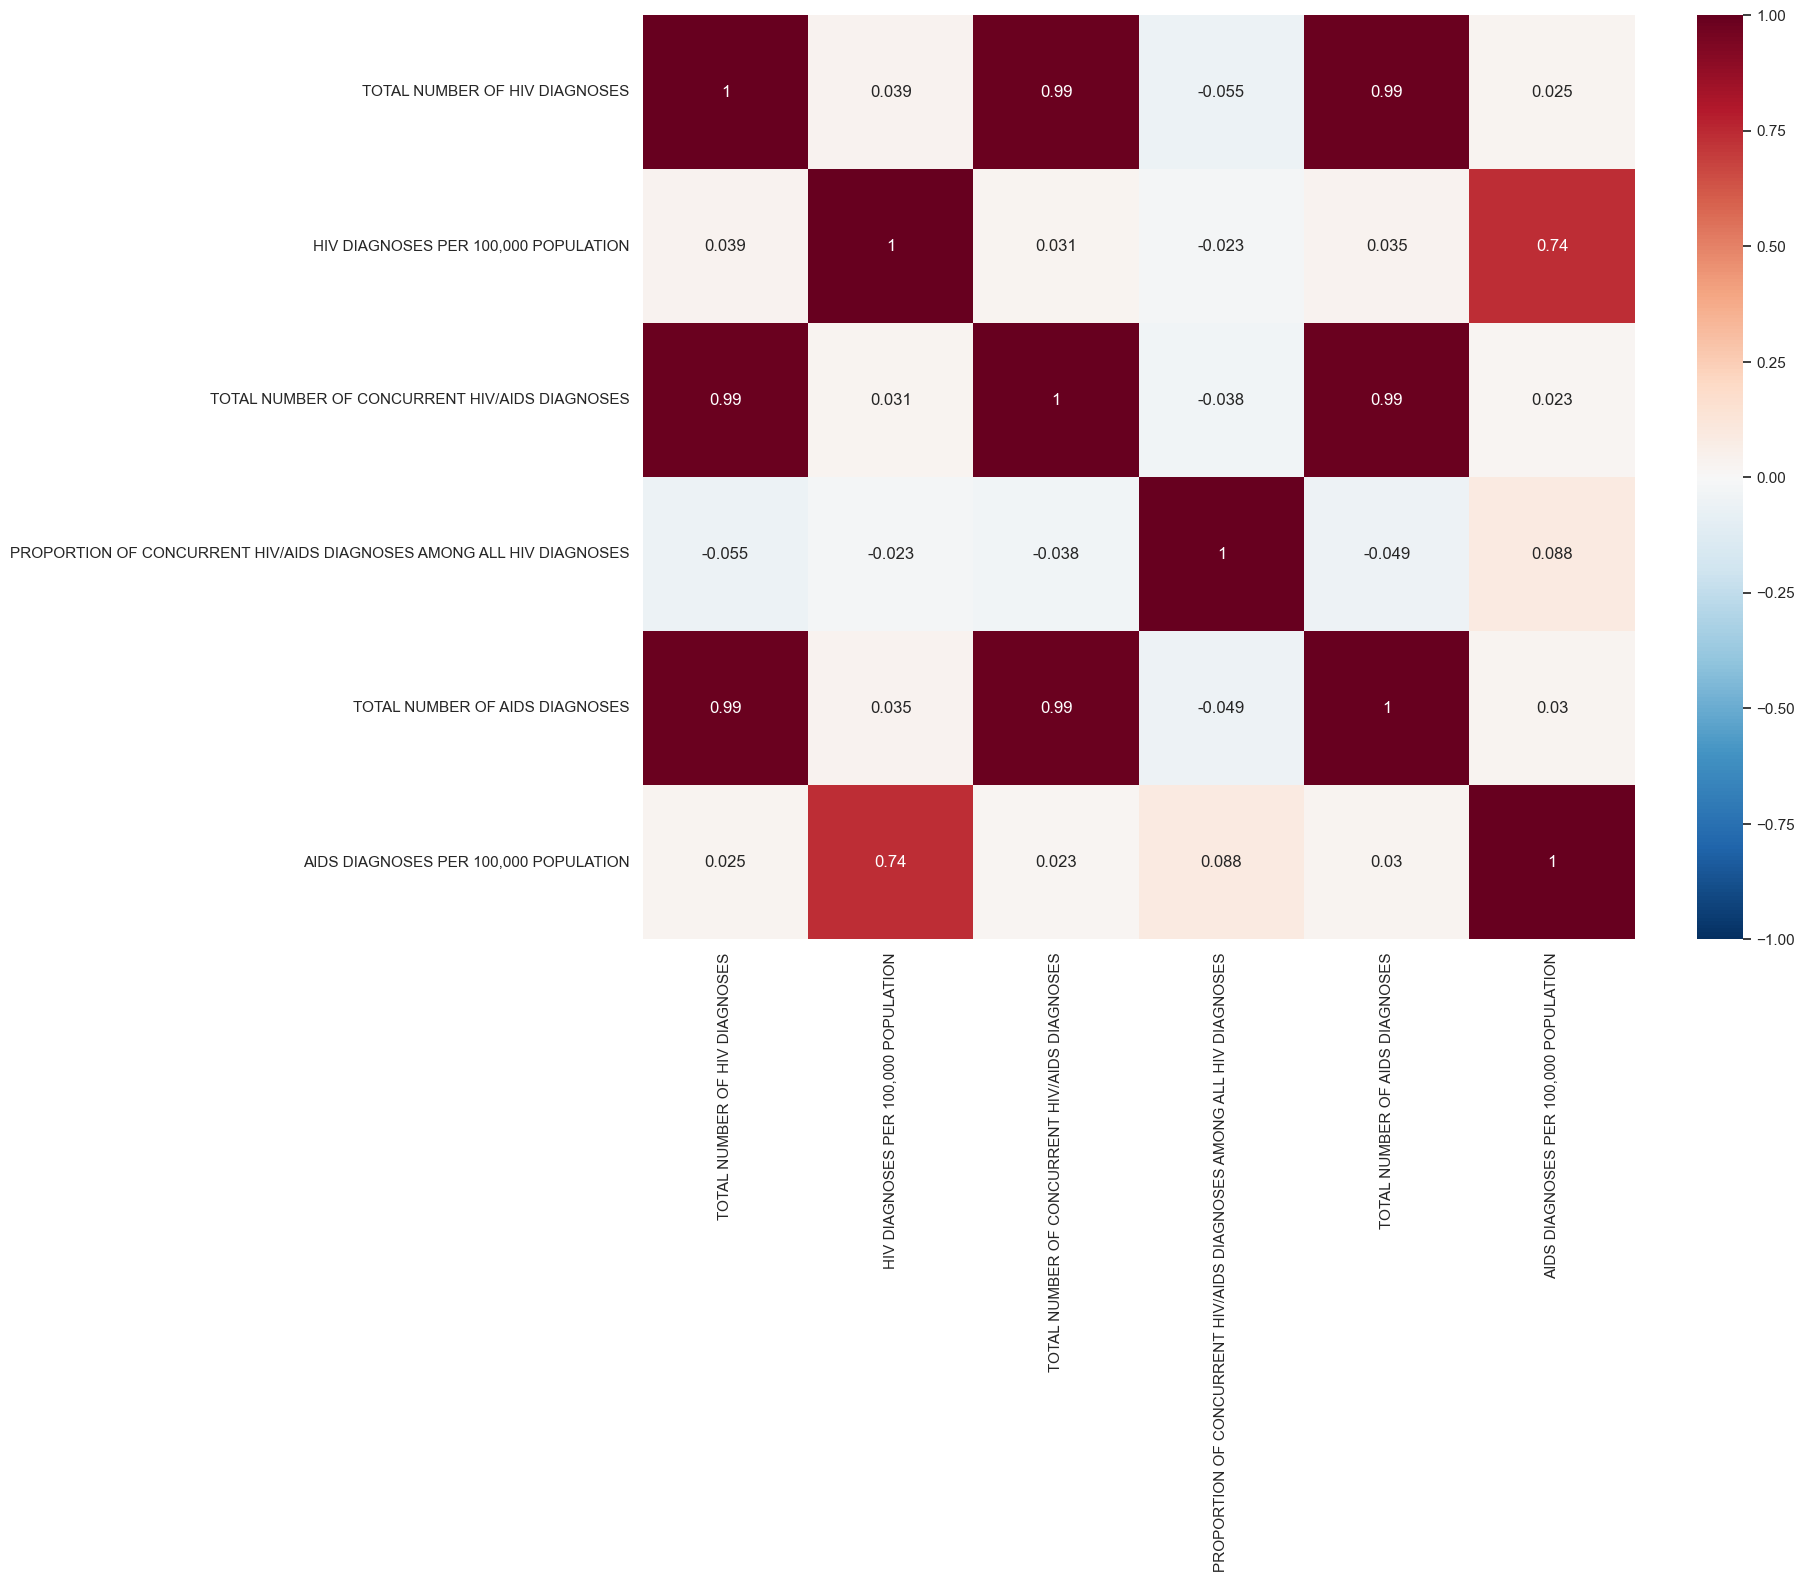

In [743]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df2[numerical_columns].corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


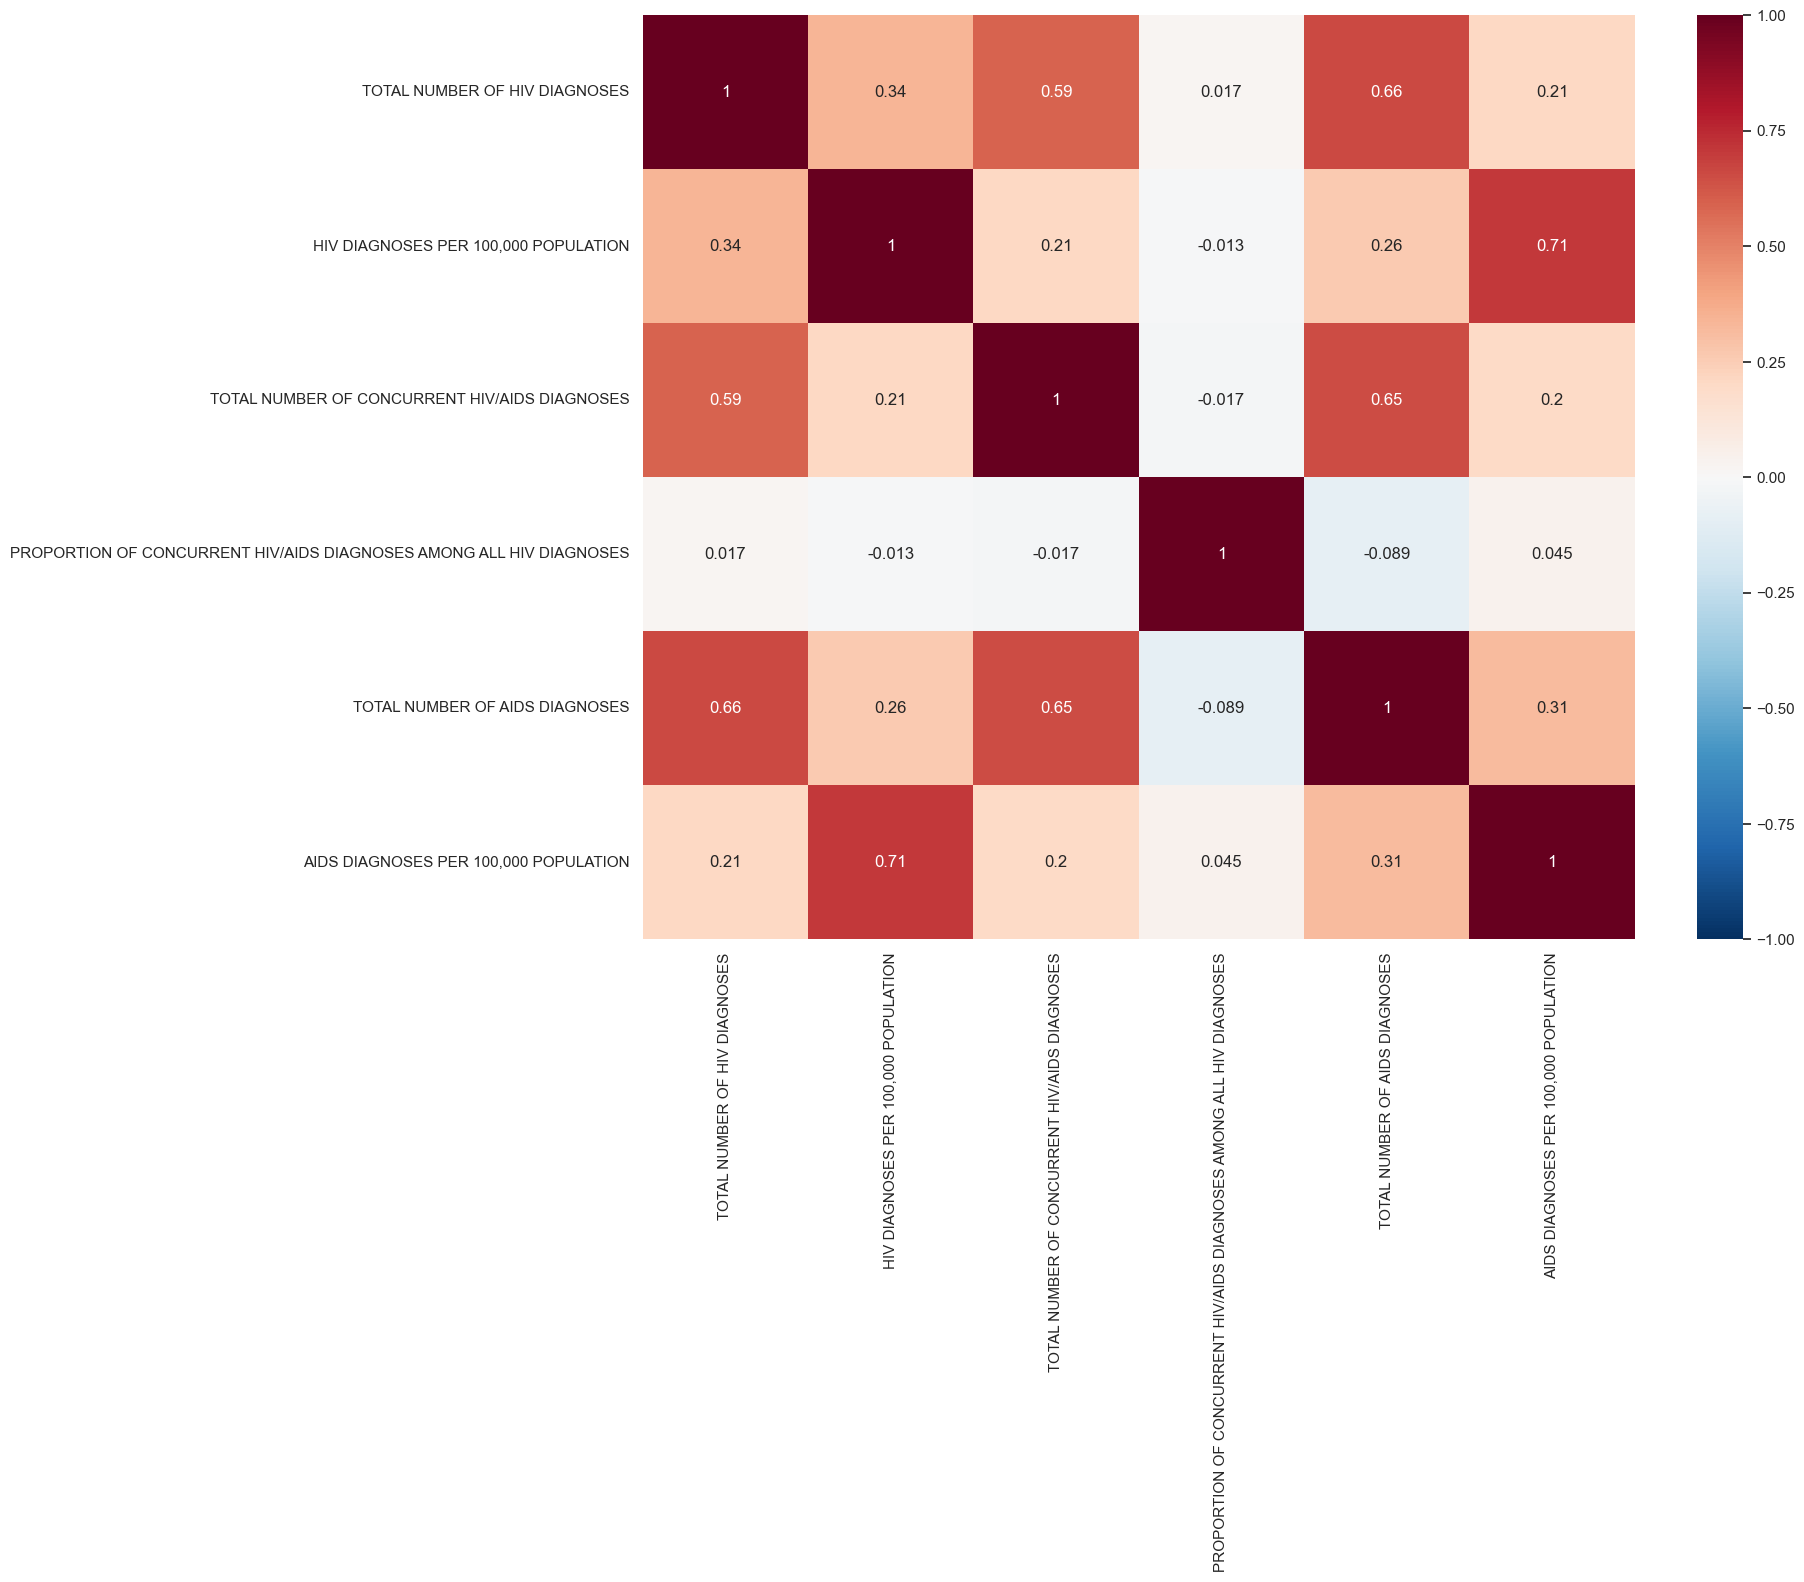

In [744]:
corr = df2[numerical_columns].corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Saving figure to: data/graphs/TOTAL NUMBER OF HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/HIV DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF CONCURRENT HIV_AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/PROPORTION OF CONCURRENT HIV_AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/TOTAL NUMBER OF AIDS DIAGNOSES.png
Figure saved successfully.
Saving figure to: data/graphs/AIDS DIAGNOSES PER 100,000 POPULATION.png
Figure saved successfully.


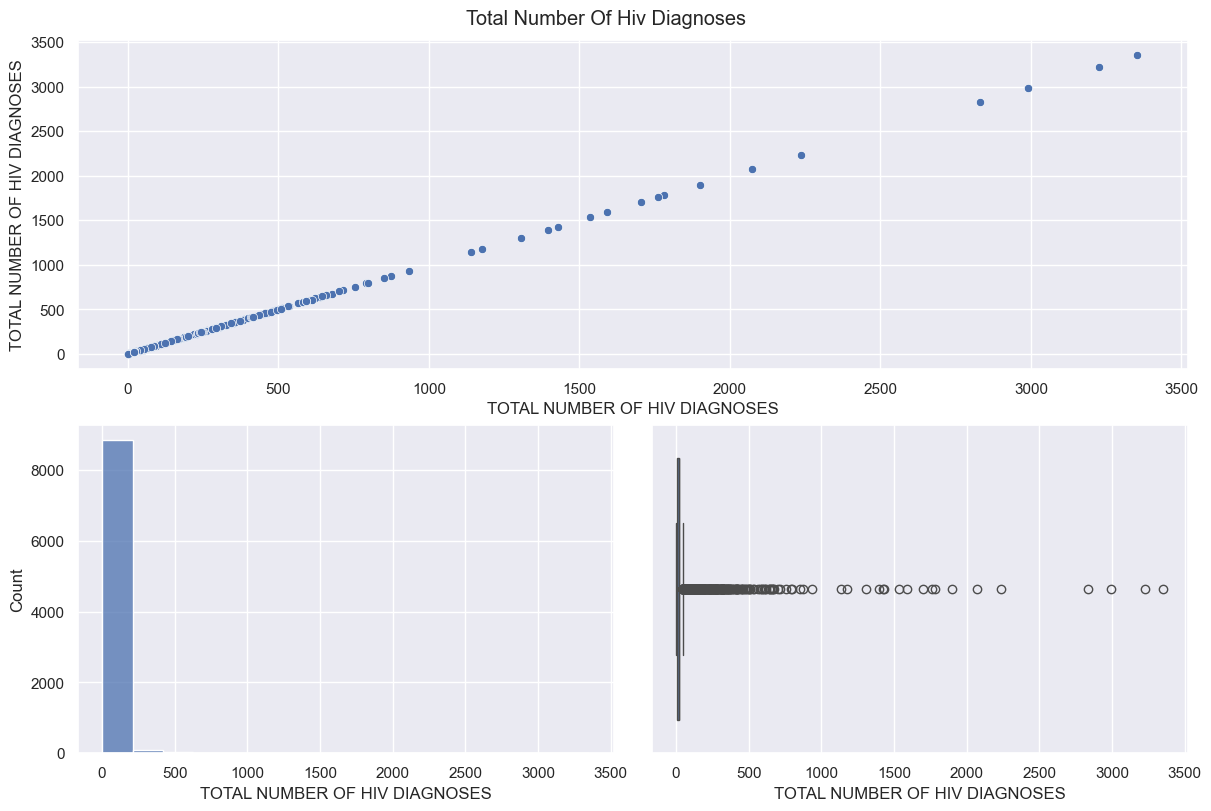

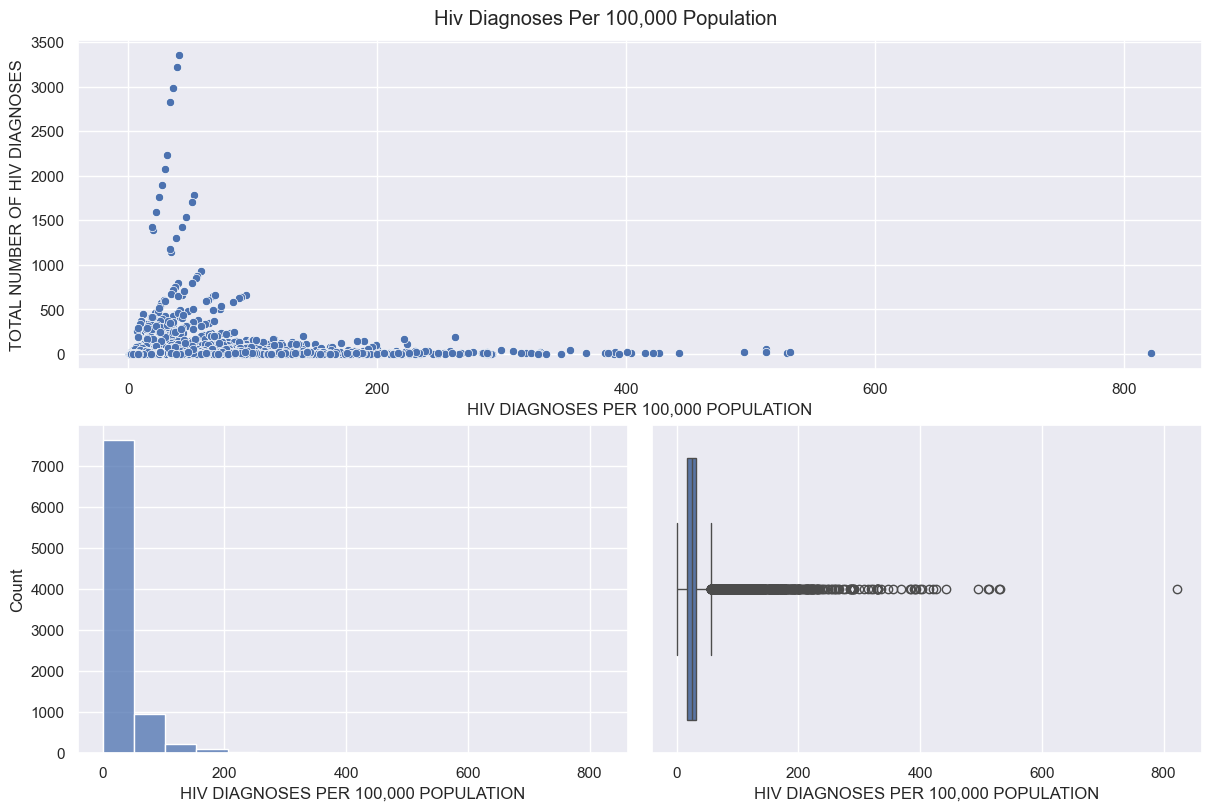

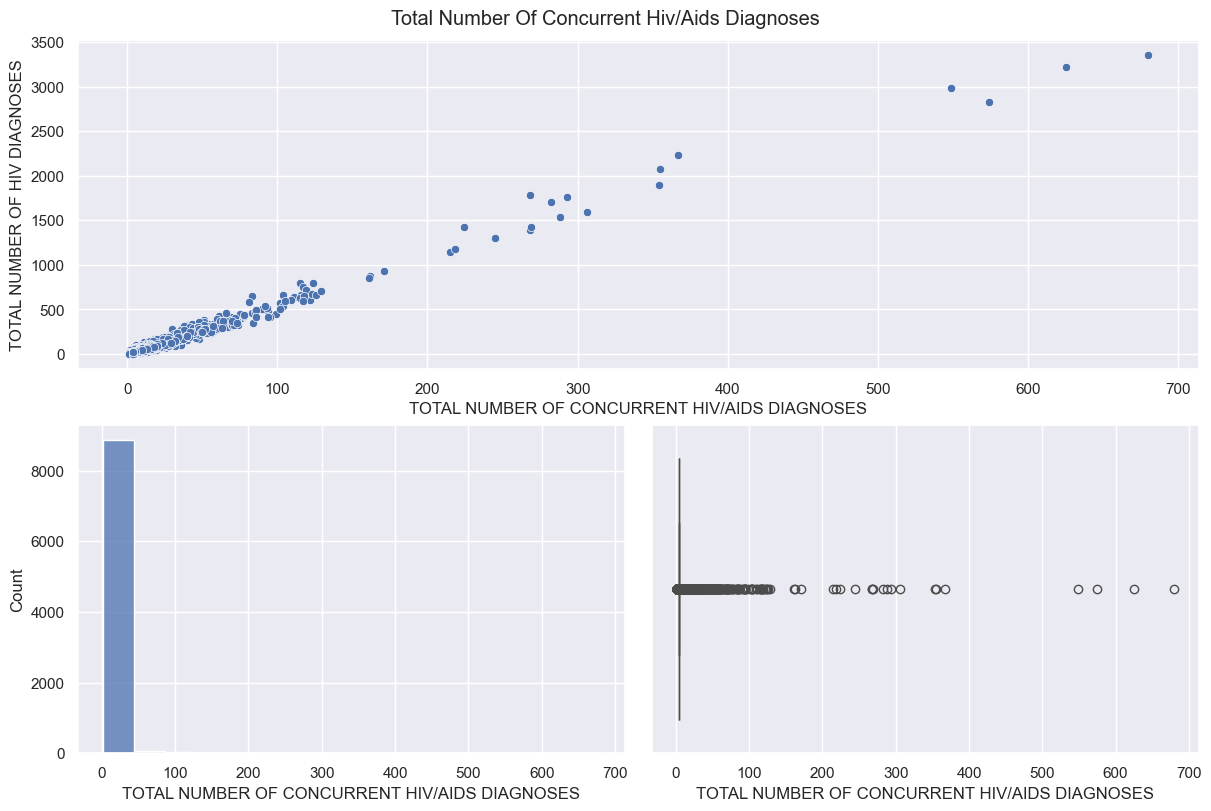

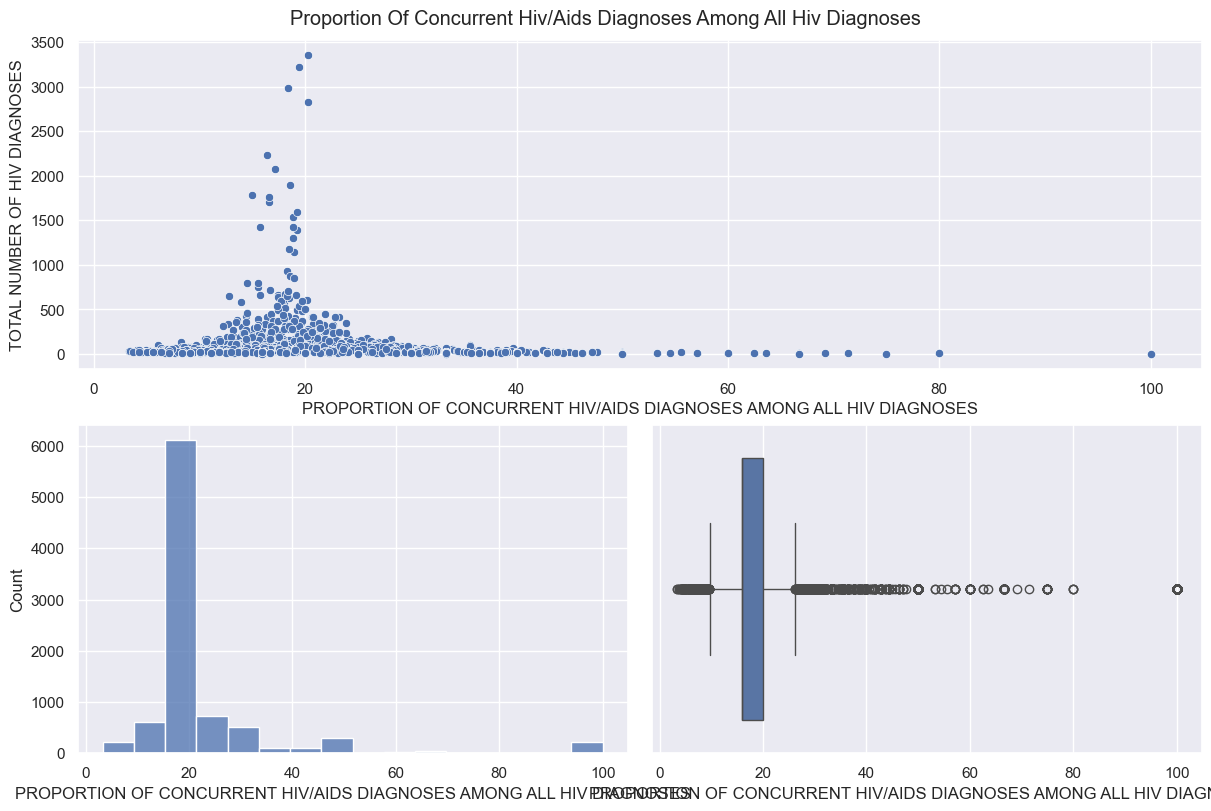

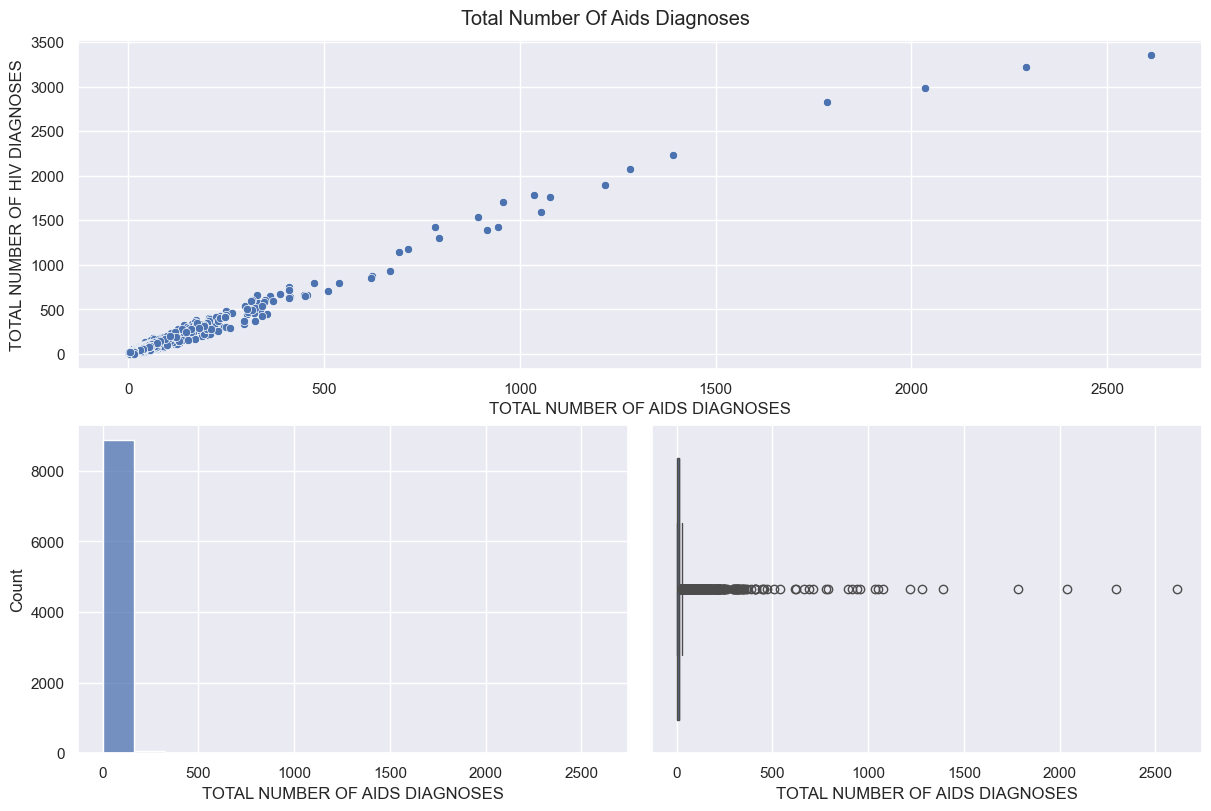

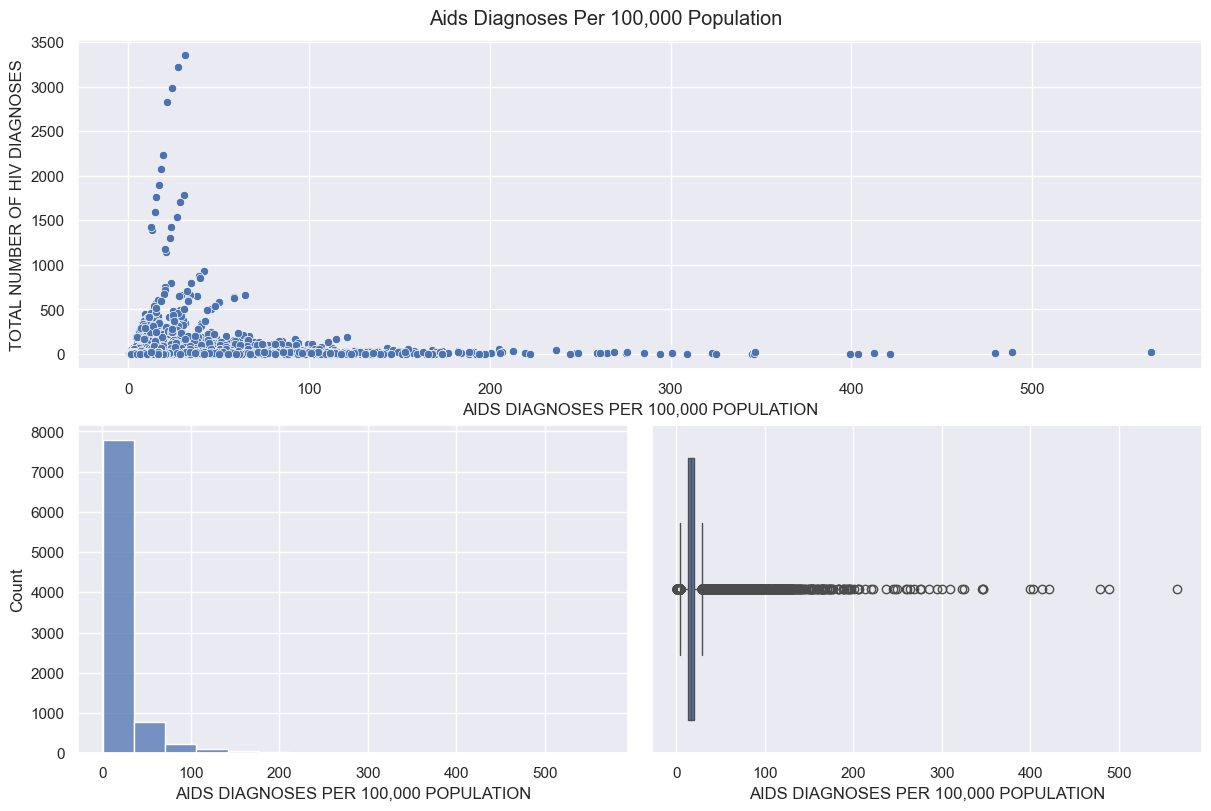

In [745]:
output_dir = 'data/graphs/'
#Function to sanitize filenames by replacing invalid characters, LIKE THE PROPORTION COLUMN AND CONCURRENT COLUMN
def sanitize_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')  # Replace invalid characters

columns = df2[numerical_columns].columns
for x_value in columns:
    sanitized_x_value = sanitize_filename(x_value)  # Clean the column name for the file name
    t_value = x_value.title()  # Convert column name to title case
    fig = plt.figure(figsize=(12, 8), constrained_layout=True) 
    gs = GridSpec(2, 2, figure=fig)
    
    save_path = os.path.join(output_dir, f"{sanitized_x_value}.png")
    print('Saving figure to:', save_path)

    # Create sub plots
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df2, x=x_value, y='TOTAL NUMBER OF HIV DIAGNOSES', ax=ax1)
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value, data=df2, bins=16, ax=ax2)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df2, x=x_value, orient='h', ax=ax3)

    fig.suptitle(t_value)
    fig.savefig(save_path, format='png')
    print('Figure saved successfully.')

In [746]:
abs_corr = df2[numerical_columns].corr()['TOTAL NUMBER OF HIV DIAGNOSES'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='TOTAL NUMBER OF HIV DIAGNOSES', axis=1, inplace=True)

In [773]:
abs_corr

TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0.989571
TOTAL NUMBER OF AIDS DIAGNOSES                                         0.988883
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0.055142
HIV DIAGNOSES PER 100,000 POPULATION                                   0.038838
AIDS DIAGNOSES PER 100,000 POPULATION                                  0.025342
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

In [774]:
conc_skew = df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'].skew()
aidsDiag_skew = df['TOTAL NUMBER OF AIDS DIAGNOSES'].skew()

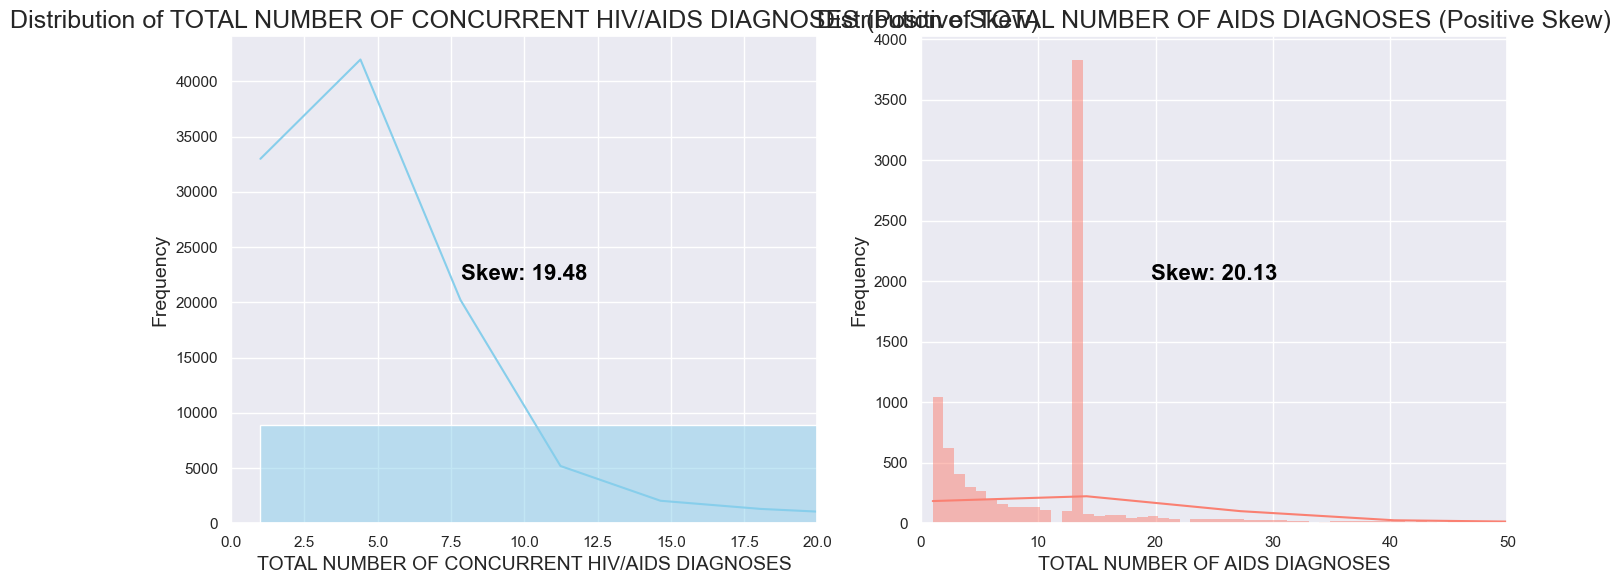

In [775]:

# Create subplots with a larger figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 

# First histogram
sns.histplot(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES (Positive Skew)', fontsize=18)
ax[0].set_xlabel('TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
# Annotate Skewness
ax[0].text(0.5, 0.5, f'Skew: {conc_skew:.2f}', transform=ax[0].transAxes,
           horizontalalignment='center', color='black', weight='bold', fontsize=16)

# Set x-axis limits for zoom effect (adjust these values as needed)
ax[0].set_xlim(0, 20)  # Change the range according to your data

# Second histogram
sns.histplot(df['TOTAL NUMBER OF AIDS DIAGNOSES'], kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of TOTAL NUMBER OF AIDS DIAGNOSES (Positive Skew)', fontsize=18)
ax[1].set_xlabel('TOTAL NUMBER OF AIDS DIAGNOSES', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
# Annotate Skewness
ax[1].text(0.5, 0.5, f'Skew: {aidsDiag_skew:.2f}', transform=ax[1].transAxes,
           horizontalalignment='center', color='black', weight='bold', fontsize=16)

# Set x-axis limits for zoom effect (adjust these values as needed)
ax[1].set_xlim(0, 50)  # Change the range according to your data

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [776]:
# Applying Log Transformation
df['log_conc'] = np.log(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
print(f"conc Skewness after Log Transformation: {df['log_conc'].skew():.5f}")
df['log_aids'] = np.log(df['TOTAL NUMBER OF AIDS DIAGNOSES'])
print(f"aids Skewness after Log Transformation: {df['log_aids'].skew():.5f}")

conc Skewness after Log Transformation: 1.07055
aids Skewness after Log Transformation: -0.07386


In [777]:
# Applying Square Root Transformation
df['sqrt_conc'] = np.sqrt(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
print(f"Violations Skewness after Square Root Transformation: {df['sqrt_conc'].skew():.5f}")
df['sqrt_aids'] = np.sqrt(df['TOTAL NUMBER OF AIDS DIAGNOSES'])
print(f"Electrical Skewness after Square Root Transformation: {df['sqrt_aids'].skew():.5f}")

Violations Skewness after Square Root Transformation: 6.77775
Electrical Skewness after Square Root Transformation: 5.72115


In [778]:
# Applying Yeo-Johnson Transformation
df['yj_conc'],_ = yeojohnson(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
print(f"Violations Skewness after Yeo-Johnson Transformation: {df['yj_conc'].skew():.5f}")
df['yj_aids'],_ = yeojohnson(df['TOTAL NUMBER OF AIDS DIAGNOSES'])
print(f"Electrical Skewness after Yeo-Johnson Transformation: {df['yj_aids'].skew():.5f}")

Violations Skewness after Yeo-Johnson Transformation: -0.11890
Electrical Skewness after Yeo-Johnson Transformation: -0.01894


# Task 3 -> Regression Analysis


In [779]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [782]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 8976 non-null   int64  
 1   Neighborhood (U.H.F)                                                 8976 non-null   object 
 2   RACE/ETHNICITY                                                       8976 non-null   object 
 3   TOTAL NUMBER OF HIV DIAGNOSES                                        8976 non-null   float64
 4   HIV DIAGNOSES PER 100,000 POPULATION                                 8976 non-null   float64
 5   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        8976 non-null   float64
 6   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  8976 non-null   float64
 7   TOTAL 

In [783]:
print("Intercept:", linModel.intercept_)
print("Coefficients:", linModel.coef_)


Intercept: 21.574358183993724
Coefficients: [-0.19693277]


In [785]:

df2.describe()

,YEAR,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",log_conc,log_aids,sqrt_conc,sqrt_aids,yj_conc,yj_aids
count,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000
mean,2016.360963,28.406931,34.076540,6.126767,21.499938,19.142522,22.895398,1.309484,2.156762,2.109521,3.500145,1.050788,2.067347
std,3.703894,105.275698,40.182161,19.355548,15.605703,69.212677,29.094193,0.777072,1.169108,1.294943,2.625314,0.241031,0.787540
min,2010.000000,1.000000,0.300000,1.000000,3.300000,1.000000,0.300000,0.000000,0.000000,1.000000,1.000000,0.583485,0.671336
25%,2013.000000,4.000000,16.800000,3.924209,15.869044,4.000000,13.500000,1.367165,1.386294,1.980962,2.000000,1.089596,1.495071
50%,2017.000000,21.010268,25.241048,3.924209,15.869044,13.517684,16.194570,1.367165,2.603999,1.980962,3.676640,1.089596,2.369261
75%,2020.000000,21.010268,32.800000,3.924209,20.000000,13.517684,19.500000,1.367165,2.603999,1.980962,3.676640,1.089596,2.369261
max,2021.000000,3353.000000,821.600000,680.000000,100.000000,2611.000000,565.500000,6.522093,7.867489,26.076810,51.097945,1.883717,5.584521


In [786]:
# Assuming df2 is your DataFrame with the required data
# Define features (X) and target variable (y)
X = df_encoded[['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'SEX_Male']].values
y = df_encoded['TOTAL NUMBER OF HIV DIAGNOSES'].values.reshape(-1, 1)

In [789]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print("Predicted Total = ", linModel.intercept_, end="")

# Add the terms based on the number of coefficients
if len(linModel.coef_) > 0:
    print(" + ", linModel.coef_[0], "* (PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES)", end="")
if len(linModel.coef_) > 1:
    print(" + ", linModel.coef_[1], "* (SEX_Male)", end="")
print()


Predicted Total =  [-4.99368387] +  [5.38245431 1.12086631] * (PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES)


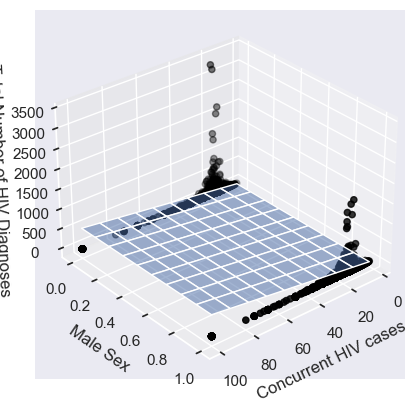

In [790]:
conc = trainX.iloc[:, 0]  # Replace 0 with the index of your chosen feature
black = trainX.iloc[:, 1]  # Replace 1 with the index of your chosen feature
y_train_flat = trainY  # This is already flat since it is (7180,)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter3D(conc, black, y_train_flat, color="Black")

# Create a meshgrid for the regression surface
xDeltaconc, xDeltablack = np.meshgrid(
    np.linspace(conc.min(), conc.max(), 10),  # Use more points for a smoother surface
    np.linspace(black.min(), black.max(), 10),
)

# Compute the regression surface
yDeltaTotal = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaconc
    + linModel.coef_[0][1] * xDeltablack
)

# Plot the regression surface
ax.plot_surface(xDeltaconc, xDeltablack, yDeltaTotal, alpha=0.5)

# Set the axes labels
ax.set_xlabel('Concurrent HIV cases')  # Change this label based on the feature you chose
ax.set_ylabel('Male Sex')  # Change this label based on the feature you chose
ax.set_zlabel('Total Number of HIV Diagnoses')  # Change this to your y variable name

# Set the view angle
ax.view_init(30, 50)

# Show the plot
plt.show()

In [791]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
r_squared = linModel.score(X, y)
print(f"Proportion of variation explained by the model (R^2): {r_squared:.4f}")

Proportion of variation explained by the model (R^2): 0.9793


In [797]:
print(f"Length of y: {len(y)}")
print(f"Length of y_pred: {len(y_pred)}")


Length of y: 8976
Length of y_pred: 1796


In [795]:
# Assuming you have a list of feature names that includes 'Black' and 'Concurrent HIV Cases'
feature_names = ['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES', 'SEX_Male']  # Replace with your actual feature names

# Construct the DataFrame for prediction using the exact names
prediction_data = {
    'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES': [20],  # Number of concurrent HIV cases
    'SEX_Male': [1]  # male as 1
}

# Convert the dictionary to DataFrame
prediction_df = pd.DataFrame(prediction_data)

# Make a prediction using the adjusted DataFrame
yMultyPredicted = linModel.predict(prediction_df)

# Print only the predicted total number of concurrent HIV/AIDS diagnoses
print(f"Predicted Total Number of HIV Diagnoses for a patient with 20 concurrent HIV cases, SEX = Male:\n{round(yMultyPredicted[0][0], 2)}")


Predicted Total Number of HIV Diagnoses for a patient with 20 concurrent HIV cases, SEX = Male:
103.78


/Users/macbookpro/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [798]:
# Assuming y_true is your actual target variable and y_pred is your predicted values
# Check that you are using the correct sets for evaluation
y_pred = linModel.predict(testX)  # Make sure this matches with y_test
mae = mean_absolute_error(testY, y_pred)
mse = mean_squared_error(testY, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(testY, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R²: {r2}')


NameError: name 'X_test' is not defined